# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#download the twitter-archive-enhanced.csv file and import it as a data frame
url1  =('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

In [4]:
#download the image_predictions.tsv file  
response1 = requests.get(url1)

if response1.status_code == 200:
    with open('image-predictions.tsv', 'wb') as file:
        file.write(response1.content)
    print('File downloaded successfully.')
else:
    print('Error downloading the file.')

File downloaded successfully.


In [5]:
#import image_predictions.tsv as a data frame
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# I have no developer Twitter account
#download the tweet_json.txt file
import requests

url2 = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response2 = requests.get(url2)

if response2.status_code == 200:
    with open('tweet-json.txt', 'wb') as file:
        file.write(response2.content)
    print('File downloaded successfully.')
else:
    print('Error downloading the file.')

File downloaded successfully.


In [7]:
#import tweet-json.txt as a data frame
import json
# Read the tweet-json.txt file
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()

# Create an empty list to store the JSON objects
tweets = []

# Iterate over each line and load the JSON object
for line in lines:
    tweet = json.loads(line)
    tweets.append(tweet)

# Create a data frame from the list of JSON objects
df_json = pd.DataFrame(tweets)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
#visually assessing df_json
df_json.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
941,None,None,Tue Jul 12 03:11:42 +0000 2016,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,None,...,False,NaN,NaN,NaN,3291,False,{'created_at': 'Sun Jan 03 05:11:12 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2258,None,None,Fri Nov 20 03:51:47 +0000 2015,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548406944960512, 'id_str'...",0,False,RT @dogratingrating: Unoriginal idea. Blatant ...,None,...,False,NaN,NaN,NaN,34,False,{'created_at': 'Fri Nov 20 03:41:59 +0000 2015...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
691,None,None,Sat Oct 15 02:04:45 +0000 2016,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Carl. He's very powerfu...,None,...,False,NaN,NaN,NaN,7798,False,{'created_at': 'Tue Jul 12 18:27:35 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
749,None,None,Fri Sep 23 01:00:13 +0000 2016,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 779123157194174464, 'id_str'...",13206,False,This is Reggie. He hugs everyone he meets. 12/...,None,...,False,NaN,NaN,NaN,4207,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
959,None,None,Thu Jul 07 19:16:47 +0000 2016,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 751132866713677825, 'id_str'...",5610,False,This is Cooper. He's just so damn happy. 10/10...,None,...,False,NaN,NaN,NaN,1480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
#programmatically assessing df_json
df_json.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


In [10]:
#visually assessing df_predictions
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
#programmatically assessing df_predictions
df_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [12]:
#visually assessing df
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
#visually assessing df
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1009,747512671126323200,NaN,NaN,2016-06-27 19:31:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747512671...,10,10,None,None,None,None,None
1197,717009362452090881,NaN,NaN,2016-04-04 15:22:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He's having some sort of exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717009362...,10,10,Smokey,None,None,pupper,None
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,None,None,None,None
279,839990271299457024,NaN,NaN,2017-03-10 00:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sojourner. His nose is a Fibonacci Spiral...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839990271...,13,10,Sojourner,None,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None


In [14]:
#visually assessing df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#programmatically assessing df
df[df['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [16]:
#programmatically assessing df
sum(df.tweet_id.duplicated())

0

In [17]:
#programmatically assessing df
sum(df.text.duplicated())

0

In [18]:
#programmatically assessing df
count = df[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda row: sum(value != 'None' for value in row), axis=1)
count[count >= 2].count()

14

In [19]:
#programmatically assessing df
df['timestamp'] = pd.to_datetime(df['timestamp'])

sum(df['timestamp'] > '2017-08-01')

2

### Tidiness issues
1. doggo, floofer, pupper, puppo columns should be merged into a dog_stage column

2. needing image_predictions.tsv to be merged with twitter-archive-enhanced.csv for extra insights

### Quality issues

1. not null retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are and tweets without images are not needed for this analysis

2. df_clean contains predictions that are not breeds of dogs and breeds of dogs but with the low confident rates

3. in_reply_to_status_id columns is under float data type 

4. in_reply_to_user_id columns is under float data type

5. timestamp is under obeject(string) column

6. null values are represented as text "None" in columns name, doggo, floofer, pupper, puppo, and new created column dog_stage

7. missing a final rating column

8. 12 tweets where the dog stage has more than one entry

9. 2 records of tweets beyond August 1st, 2017

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
df_clean = df.copy()
df_predictions_clean = df_predictions.copy()
df_json_clean = df_json.copy()

### Tidiness issues

### Issue #1:doggo, floofer, pupper, puppo columns should be merged into a dog stage column

#### Define:  create a column named "dog stage" for columns doggo, floofer, pupper, puppo and fill the corresponding dog stage in the column for each tweet 

#### Code

In [21]:
#create a function to pick a vaild dog stage record from doggo, floofer, pupper, puppo columns
def fill_dog_stage(row):
    if row['doggo'] != 'None':
        return 'doggo'
    elif row['floofer'] != 'None':
        return 'floofer'
    elif row['pupper'] != 'None':
        return 'pupper'
    elif row['puppo'] != 'None':
        return 'puppo'
    else:
        return None

# Applying the function to create the 'dog_stage' column
df_clean['dog_stage'] = df_clean.apply(fill_dog_stage, axis=1)

#### Test

In [22]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None,None
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None,pupper
1143,727314416056803329,NaN,NaN,2016-05-03 01:50:44,"<a href=""http://twitter.com/download/iphone"" r...",This pupper was about to explain where that di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727314416...,11,10,None,None,None,pupper,None,pupper
859,763183847194451968,NaN,NaN,2016-08-10 01:23:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He collects teddy bears. It's a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,None,None,None,None,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None,None


### Issue #2: needing image_predictions.tsv to be merged with twitter-archive-enhanced.csv for extra insights

#### Define:  make image-predictions.tsv left join df_clean for having data from both datasets 

#### Code

In [23]:
#make df_predictions left join df_clean
df_clean = df_clean.merge(df_predictions_clean, on='tweet_id', how='left')

#### Test

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage               

### Quality issues

### Issue #1: not null retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are and tweets without images are not needed for this analysis

#### Define:  filter coumns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp to only null values and drop the rows where expanded_urls is null

#### Code

In [25]:
# Filter out retweets
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
# Filter out tweets without images
df = df.dropna(subset=['expanded_urls'])

#### Test

In [26]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Issue #2: merged data frame contains predictions that are not breeds of dogs and breeds of dogs but with the low confident ratest

#### Define: create an indicator column that signifies the predictions with the highest confidence level but also associated with the breed of the dog

#### Code

In [27]:
#extract the greatest confidence level in a column called 'greatest_conf'
df_clean['greatest_conf'] = df_clean[['p1_conf', 'p2_conf', 'p3_conf']].max(axis=1)

In [28]:
# create a function to select the dog breed when the they have the greatest confidence level among all 3 algorithms
def fill_dog_breed(row):
    if row['p1_dog'] and row['p1_conf'] == row['greatest_conf']:
        return row['p1']
    elif row['p2_dog'] and row['p2_conf'] == row['greatest_conf']:
        return row['p2']
    elif row['p3_dog'] and row['p3_conf'] == row['greatest_conf']:
        return row['p3']
    else:
        return None

# Applying the function to create the 'dog_index' column
df_clean['dog_breed'] = df_clean.apply(fill_dog_breed, axis=1)

#### Test

In [29]:
df_clean['dog_breed'].value_counts()

golden_retriever                  139
Labrador_retriever                 95
Pembroke                           88
Chihuahua                          79
pug                                54
chow                               41
Samoyed                            40
Pomeranian                         38
toy_poodle                         38
malamute                           29
cocker_spaniel                     27
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 22
German_shepherd                    20
Siberian_husky                     20
Staffordshire_bullterrier          19
Maltese_dog                        18
Eskimo_dog                         18
Shetland_sheepdog                  18
beagle                             17
Shih-Tzu                           17
Cardigan                           17
Rottweiler                         17
kuvasz                             16
Italian_greyhound                  16
Lakeland_ter

### Issue #3: in_reply_to_status_id column is under float data type

In [30]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,greatest_conf,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0.097049,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.170278,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712,basset


#### Define: in_reply_to_status_id should be integer type.

#### Code

In [31]:
# Convert 'in_reply_to_status_id' column's non-null values to numeric, and non-numeric values to NaN
df_clean['in_reply_to_status_id'] = pd.to_numeric(df_clean['in_reply_to_status_id'], errors='coerce')
# Fill null values with a temporary placeholder value '0' and convert the non-null values to integer data type
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].fillna('0').astype(int)

#### Test

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null int64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dog_stage                     

In [33]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,greatest_conf,dog_breed
0,892420643555336193,0,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0.097049,None
1,892177421306343426,0,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581,Chihuahua
2,891815181378084864,0,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012,Chihuahua
3,891689557279858688,0,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.170278,None
4,891327558926688256,0,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712,basset


### Issue #4:  in_reply_to_user_id columns is under float data type

#### Define: in_reply_to_user_id should be integer type.

#### Code

In [34]:
# Convert 'in_reply_to_user_id' column's non-null values to numeric, and non-numeric values to NaN
df_clean['in_reply_to_user_id'] = pd.to_numeric(df_clean['in_reply_to_user_id'], errors='coerce')
# Fill null values with a temporary placeholder value '0' and convert the non-null values to integer data type
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].fillna('0').astype(int)

#### Test

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null int64
in_reply_to_user_id           2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dog_stage                     

### Issue #5:  timestamp is under obeject(string) column

#### Define: timestamp column should be datetime type.

#### Code

In [36]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null int64
in_reply_to_user_id           2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dog_stage                     

### Issue #6:  null values are represented as text "None" in columns name, doggo, floofer, pupper, puppo and new created column dog_stage 

#### Define: change text "None" in columns name, doggo, floofer, pupper, puppo to null

#### Code

In [38]:
#ensure the datatype before get the coverting done 
df_clean['dog_stage'] = df_clean['dog_stage'].astype(str)

In [39]:
#convert text"None" to null values
df_clean['name'] = df_clean['name'].replace('None', np.NaN)
df_clean['doggo'] = df_clean['doggo'].replace('None', np.NaN)
df_clean['floofer'] = df_clean['floofer'].replace('None', np.NaN)
df_clean['pupper'] = df_clean['pupper'].replace('None', np.NaN)
df_clean['puppo'] = df_clean['puppo'].replace('None', np.NaN)
df_clean['dog_stage'] = df_clean['dog_stage'].replace('None', np.NaN)

#### Test

In [40]:
df_clean[df_clean['dog_stage'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,greatest_conf,dog_breed
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0.097049,None
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581,Chihuahua
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012,Chihuahua
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.170278,None
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712,basset
5,891087950875897856,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0.425595,Chesapeake_Bay_retriever
6,890971913173991426,0,0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,0.341703,Appenzeller
7,890729181411237888,0,0,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,0.566142,Pomeranian
8,890609185150312448,0,0,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,0.487574,Irish_terrier
10,890006608113172480,0,0,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,0.957979,Samoyed


### Issue #7: missing a final rating column

#### Define: the rating coulmn should have the rating_numerator devided by rating_denominator

#### Code

In [41]:
#
#calculate the rating based on rating_numerator and rating_denominator in the dataset
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']
df_clean['rating'] = df_clean['rating'].map('{:.1f}'.format)
df_clean['rating'] = pd.to_numeric(df_clean['rating'])

#### Test

In [42]:
df_clean['rating']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
20      1.2
21      1.3
22      1.4
23      1.3
24      1.3
25      1.2
26      1.3
27      1.3
28      1.3
29      1.2
30      1.2
       ... 
2326    0.2
2327    0.7
2328    0.9
2329    1.1
2330    0.6
2331    0.8
2332    1.0
2333    0.9
2334    0.3
2335    0.5
2336    1.1
2337    1.0
2338    0.1
2339    1.1
2340    0.8
2341    0.9
2342    0.6
2343    1.0
2344    0.9
2345    1.0
2346    0.8
2347    0.9
2348    1.0
2349    0.2
2350    1.0
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating, Length: 2175, dtype: float64

### Issue #8: 12 tweets where the dog stage has more than one entry.

#### Define: fill dog_stage column with text "uncertain" where doggo, floofer, pupper, puppo columns have more than one entry

#### Code

In [43]:
#find the dog statge when over 1 field is filled and mark it as "uncertain"
count = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda row: sum(pd.notnull(value) for value in row), axis=1)
df_clean.loc[count >= 2, 'dog_stage'] = "uncertain"

#### Test

In [44]:
df_clean[count >= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,greatest_conf,dog_breed,rating
191,855851453814013952,0,0,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,...,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,0.321676,flat-coated_retriever,1.3
200,854010172552949760,0,0,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,True,collie,0.177538,True,Border_collie,0.131706,True,0.354733,English_springer,1.1
460,817777686764523521,0,0,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,0.733256,curly-coated_retriever,1.3
531,808106460588765185,0,0,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,...,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,0.426183,golden_retriever,1.2
565,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,...,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True,0.897162,Labrador_retriever,1.1
575,801115127852503040,0,0,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,...,True,English_setter,0.094602,True,bluetick,0.021953,True,0.823356,dalmatian,1.2
705,785639753186217984,0,0,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,...,False,sea_urchin,0.006106,False,echidna,0.005442,False,0.978042,None,1.0
733,781308096455073793,0,0,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1.2
889,759793422261743616,0,0,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,...,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,0.985876,golden_retriever,1.2
956,751583847268179968,0,0,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,...,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,0.868304,dalmatian,0.5


### Issue #9: 2 records of tweets beyond August 1st, 2017

#### Define: 2 records of tweets beyond August 1st, 2017

#### Code

In [45]:
df_clean = df_clean.drop(df_clean[df_clean['timestamp'] > '2017-08-01'].index)

#### Test

In [46]:
df_clean[df_clean['timestamp'] > '2017-08-01']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,greatest_conf,dog_breed,rating


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [47]:
df_clean.to_csv('twitter_archive_master.csv', index=False)
df_predictions_clean.to_csv('image_predictions_clean.csv', index=False)
df_json_clean.to_csv('tweet_json_clean.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. pupper received the lowest average rating among all the dog stages(excluding the null values and uncertain tweets).

2. Pupper generated the highest number of replies among all dog stages.

3. Clumber is the top-rated dog breed, followed by Pomeranian, Saluki, Briard, and Tibetan Mastiff, making them the five dog breeds with the highest ratings.

### Visualization

#### 1.Create a histogram to visualize the distribution of ratings

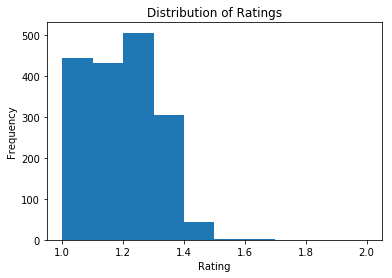

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_filtered = df_clean[df_clean['rating'] != float('inf')]
df_filtered['rating'].plot(kind='hist', range=(1, 2))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

#### 2. create a visualization to visualize the most common dog breeds (top 5)

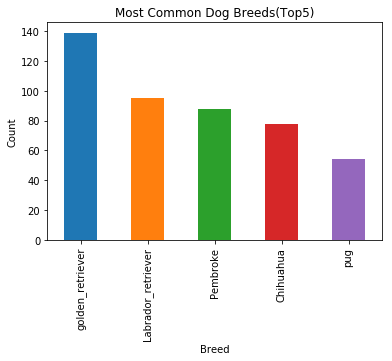

In [53]:
# Count the occurrences of each breed
breed_counts1 = df_clean['dog_breed'].value_counts().nlargest(5)

# Plot the bar chart
breed_counts1.plot(kind='bar')

# Customize the plot
plt.xlabel('Breed')
plt.ylabel('Count')
plt.title('Most Common Dog Breeds(Top5)')

# Display the plot
plt.show()

#### 3. create a visualization to determine which dog stage is the most commonly mentioned

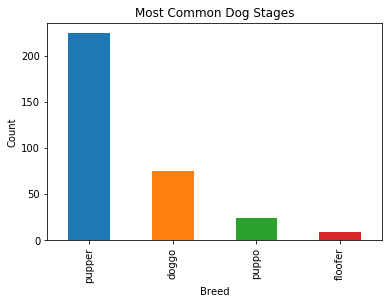

In [58]:
# Count the occurrences of each stage
breed_counts2 = df_clean[df_clean['dog_stage'] != "uncertain"]['dog_stage'].value_counts()

# Plot the bar chart
breed_counts2.plot(kind='bar')

# Customize the plot
plt.xlabel('Breed')
plt.ylabel('Count')
plt.title('Most Common Dog Stages')

# Display the plot
plt.show()

In [56]:
breed_counts2

pupper       224
doggo         75
puppo         24
uncertain     12
floofer        9
Name: dog_stage, dtype: int64